In [1]:
from src import *
from time import time
import matplotlib.pyplot as plt
#%matplotlib notebook

# Question 3.2

In [18]:
N_max = 600
p = 0.25
runs = 10
print("N_max =", N_max)
print("p =", p)

tn_generation = np.zeros(runs)
tn_couplage = np.zeros(runs)
tn_glouton = np.zeros(runs)

len_glouton = np.zeros(runs)
len_couplage = np.zeros(runs)
len_optimale = np.zeros(runs)

for k in range(1,runs + 1):
    n = int(k*N_max/runs)
     #p = 1 / np.sqrt(n)

    tn_generation_it = 0
    tn_couplage_it = 0
    tn_glouton_it = 0
    cou = 0
    glu = 0
    opt = 0

    print("n =", n)

    for i in range(3):

        t1 = time()
        G = generate_random_graph(n,p)
        t2 = time()
        tn_generation_it += (t2-t1)

        #algo_couplage
        t1 = time()
        tmp = algo_couplage(G)
        t2 = time()
        tn_couplage_it += (t2-t1)
        cou += len(tmp)
        

        t1 = time()
        tmp = algo_glouton(G)
        t2 = time()
        tn_glouton_it += (t2-t1)
        glu += len(tmp)
        
        #opt += len(branch3(G))
        
    len_glouton[k - 1] = glu / 10
    len_couplage[k - 1] = cou / 10
    len_optimale[k - 1] = opt /10

    # calcul de la moyenne des temps d'exécution
    tn_generation[k - 1] = tn_generation_it / 10
    tn_couplage[k - 1] = tn_couplage_it / 10
    tn_glouton[k - 1] = tn_glouton_it / 10

#print("\tgeneration du graphe :", tn_generation)
#print("\t\t log :", np.log10(tn_generation))
print("\talgo_couplage :", tn_couplage)
print("\t\t log :", np.log(tn_couplage))
print("\talgo_glouton :", tn_glouton)
print("\t\t log :", np.log(tn_glouton))

N_max = 600
p = 0.25
n = 60
n = 120
n = 180
n = 240
n = 300
n = 360
n = 420
n = 480
n = 540
n = 600
	algo_couplage : [7.83443451e-05 2.58040428e-04 5.06281853e-04 7.66038895e-04
 1.12323761e-03 1.66277885e-03 2.31680870e-03 3.14052105e-03
 4.04934883e-03 5.14674187e-03]
		 log : [-9.45439677 -8.26239429 -7.58841702 -7.17427761 -6.79154004 -6.39926507
 -6.0675646  -5.76336655 -5.50919919 -5.26939141]
	algo_glouton : [0.00128229 0.00842121 0.02125103 0.04398708 0.0791786  0.13537567
 0.21722028 0.32112966 0.45376863 0.65421455]
		 log : [-6.65911035 -4.77700217 -3.85134969 -3.12385925 -2.53604927 -1.99970165
 -1.52684331 -1.13591033 -0.79016783 -0.42431992]


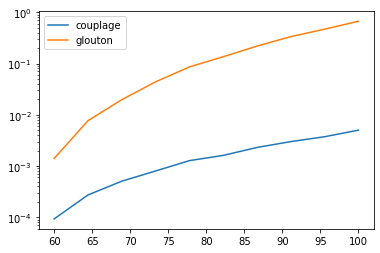

In [7]:
x = np.linspace(N_max / runs, 100, num=runs)
plt.plot(x, tn_couplage, label='couplage')
plt.plot(x, tn_glouton, label='glouton')
plt.legend()
plt.yscale('log')

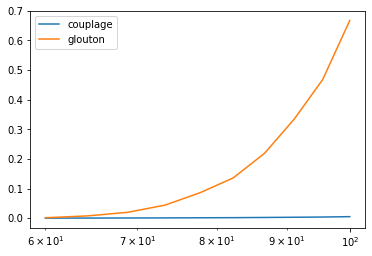

In [8]:
plt.plot(x, tn_couplage, label='couplage')
plt.plot(x, tn_glouton, label='glouton')
plt.legend()
plt.xscale('log')

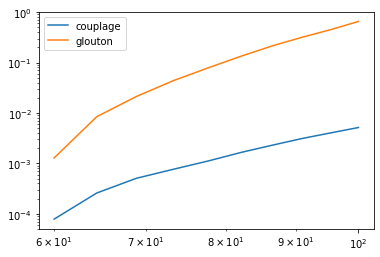

In [19]:
plt.plot(x, tn_couplage, label='couplage')
plt.plot(x, tn_glouton, label='glouton')
plt.legend()
plt.xscale('log')
plt.yscale('log')

[  7.58299677 -17.35356883]


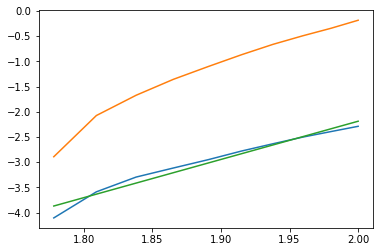

In [20]:
tn_couplage_log = np.log10(tn_couplage)
tn_glouton_log = np.log10(tn_glouton)
x_log = np.log10(x)
plt.plot(x_log,tn_couplage_log)
plt.plot(x_log,tn_glouton_log)
line_params = np.polyfit(x_log,tn_couplage_log,1)
print(line_params)
plt.plot(x_log,x_log*line_params[0] + line_params[1])


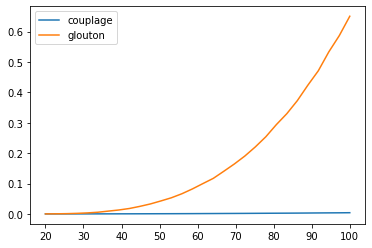

In [6]:
plt.plot(x, tn_couplage, label='couplage')
plt.plot(x, tn_glouton, label='glouton')
plt.legend()

[-2.34754306e-13  1.40210916e-10 -3.55704630e-08  4.96821616e-06
 -4.12546555e-04  2.03652752e-02 -5.53391405e-01  6.38561973e+00]


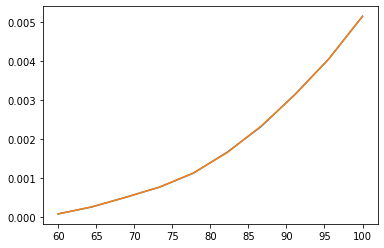

In [22]:
coefficients = np.polyfit(x,tn_couplage,7)
print(coefficients)
poly = np.poly1d(coefficients)

plt.plot(x, tn_couplage, label='couplage')
plt.plot(x, poly(x))

[ 1.21532222e-06 -7.13905836e-05  1.64007115e-03 -1.46180894e-02]


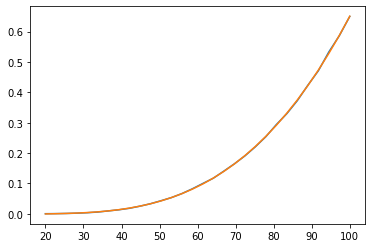

In [8]:
coefficients = np.polyfit(x,tn_glouton,3)
print(coefficients)
poly = np.poly1d(coefficients)

plt.plot(x, tn_glouton, label='glouton')
plt.plot(x, poly(x))

### qualite

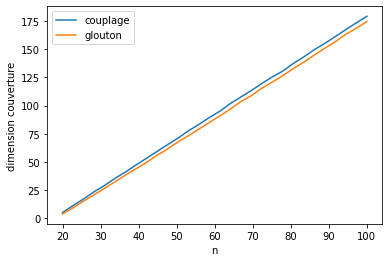

In [9]:
plt.plot(x, len_couplage, label='couplage')
plt.plot(x, len_glouton, label='glouton')
#plt.plot(x, len_optimale, label='optimale')
plt.ylabel('dimension couverture')
plt.xlabel('n')
plt.legend()

In [10]:
print(np.mean(len_glouton / len_couplage))
print(len_glouton / len_couplage)
print(100 - np.mean(len_couplage / len_optimale) * 100, '%')
print(100 - np.mean(len_glouton / len_optimale) * 100, '%')

0.9385757043806813
[0.76       0.82142857 0.88823529 0.88888889 0.9137931  0.91242938
 0.93414634 0.9279661  0.93045113 0.94256757 0.94171779 0.95352113
 0.94458763 0.95072115 0.950783   0.95684211 0.9518664  0.96189591
 0.95943563 0.96488294 0.96411483 0.96860643 0.96724891 0.96717877
 0.96858289 0.97229381 0.97208437 0.97491039 0.97231834 0.97377232]
-inf %
-inf %


<ipython-input-10-80ff5afab92d>:3: RuntimeWarning: divide by zero encountered in true_divide
  print(100 - np.mean(len_couplage / len_optimale) * 100, '%')
<ipython-input-10-80ff5afab92d>:4: RuntimeWarning: divide by zero encountered in true_divide
  print(100 - np.mean(len_glouton / len_optimale) * 100, '%')


N_max = 600
p = 0.25
p = 0.05
p = 0.1
p = 0.15
p = 0.2
p = 0.25
p = 0.3
p = 0.35
p = 0.4
p = 0.45
p = 0.5
p = 0.55
p = 0.6
p = 0.65
p = 0.7
p = 0.75
p = 0.8
p = 0.85
p = 0.9
p = 0.95
p = 1.0
0.8243120755167557
[0.65384615 0.6875     0.70945946 0.71604938 0.74712644 0.78888889
 0.80337079 0.79891304 0.81914894 0.84375    0.84210526 0.87894737
 0.8814433  0.84848485 0.89175258 0.88383838 0.91752577 0.90909091
 0.915      0.95      ]


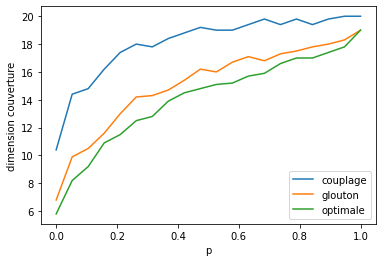

In [19]:

p = 0.25
runs = 20
print("N_max =", N_max)
print("p =", p)

tn_generation = np.zeros(runs)
tn_couplage = np.zeros(runs)
tn_glouton = np.zeros(runs)

len_glouton = np.zeros(runs)
len_couplage = np.zeros(runs)
len_optimale = np.zeros(runs)

for k in range(1,runs + 1):
    p = k/runs
    n = 20
    cou = 0
    glu = 0
    opt = 0

    print("p =", p)

    for i in range(10):
        G = generate_random_graph(n,p)

        #algo_couplage
        tmp = algo_couplage(G)
        cou += len(tmp)
        
        tmp = algo_glouton(G)
        glu += len(tmp)
        
        opt += len(branch3(G))
        
    len_glouton[k - 1] = glu / 10
    len_couplage[k - 1] = cou / 10
    len_optimale[k - 1] = opt /10

print(np.mean(len_glouton / len_couplage))
print(len_glouton / len_couplage)
x_p = np.linspace(0,1,runs)

plt.plot(x_p, len_couplage, label='couplage')
plt.plot(x_p, len_glouton, label='glouton')
plt.plot(x_p, len_optimale, label='optimale')
plt.ylabel('dimension couverture')
plt.xlabel('p')
plt.legend()

In [23]:
print(np.mean(len_couplage / len_optimale))
print(np.mean(len_glouton / len_optimale))

print(len_glouton / len_couplage)

1.3341669412791242
1.0834184856988467
[0.65384615 0.6875     0.70945946 0.71604938 0.74712644 0.78888889
 0.80337079 0.79891304 0.81914894 0.84375    0.84210526 0.87894737
 0.8814433  0.84848485 0.89175258 0.88383838 0.91752577 0.90909091
 0.915      0.95      ]
